In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
import cv2
import numpy as np

dataset_path = "archive\leapGestRecog\leapGestRecog"

IMG_SIZE = 64

images = []
labels = []

for participant_folder in os.listdir(dataset_path):
    participant_path = os.path.join(dataset_path, participant_folder)
    
    if os.path.isdir(participant_path):
        for gesture_folder in os.listdir(participant_path):
            gesture_path = os.path.join(participant_path, gesture_folder)
            
            if os.path.isdir(gesture_path):
                for img_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_file)
                    
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    
                    images.append(img)
                    labels.append(gesture_folder)

images = np.array(images)
labels = np.array(labels)

print("Number of images:", images.shape[0])
print("Image shape:", images.shape[1:])
print("Number of labels:", labels.shape[0])

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sujal\AppData\Local\Temp\ipykernel_17528\3250396029.py:5: SyntaxWarning: invalid escape sequence '\l'
  dataset_path = "archive\leapGestRecog\leapGestRecog"


Number of images: 20000
Image shape: (64, 64)
Number of labels: 20000


In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

images = images / 255.0
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.35, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(labels.shape[1], activation='softmax'))

model.summary()

c:\Users\sujal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.6466 - loss: 1.0196 - val_accuracy: 0.9987 - val_loss: 0.0080
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.9834 - loss: 0.0541 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 36s 88ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9989 - val_loss: 0.0037
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9908 - loss: 0.0284 - val_accuracy: 0.9980 - val_loss: 0.0037
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - accuracy: 0.9912 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 3.0164e-04
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9962 - loss: 0.0106 - val_accuracy: 0.9996 - val_loss: 0.0010
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 2.8421e-04
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.9981 - loss: 0

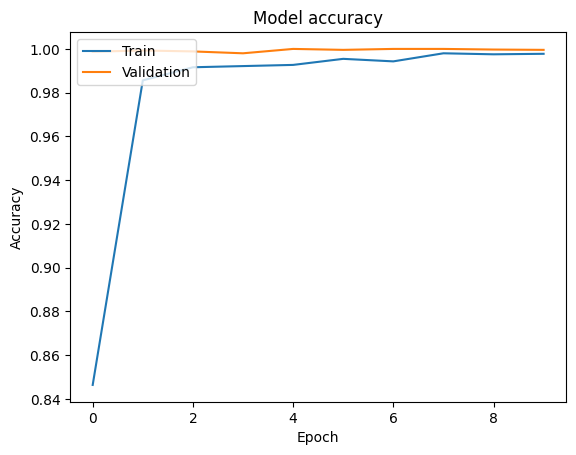

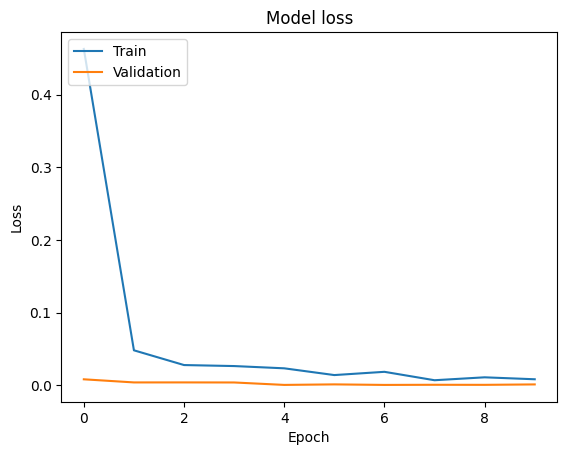

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

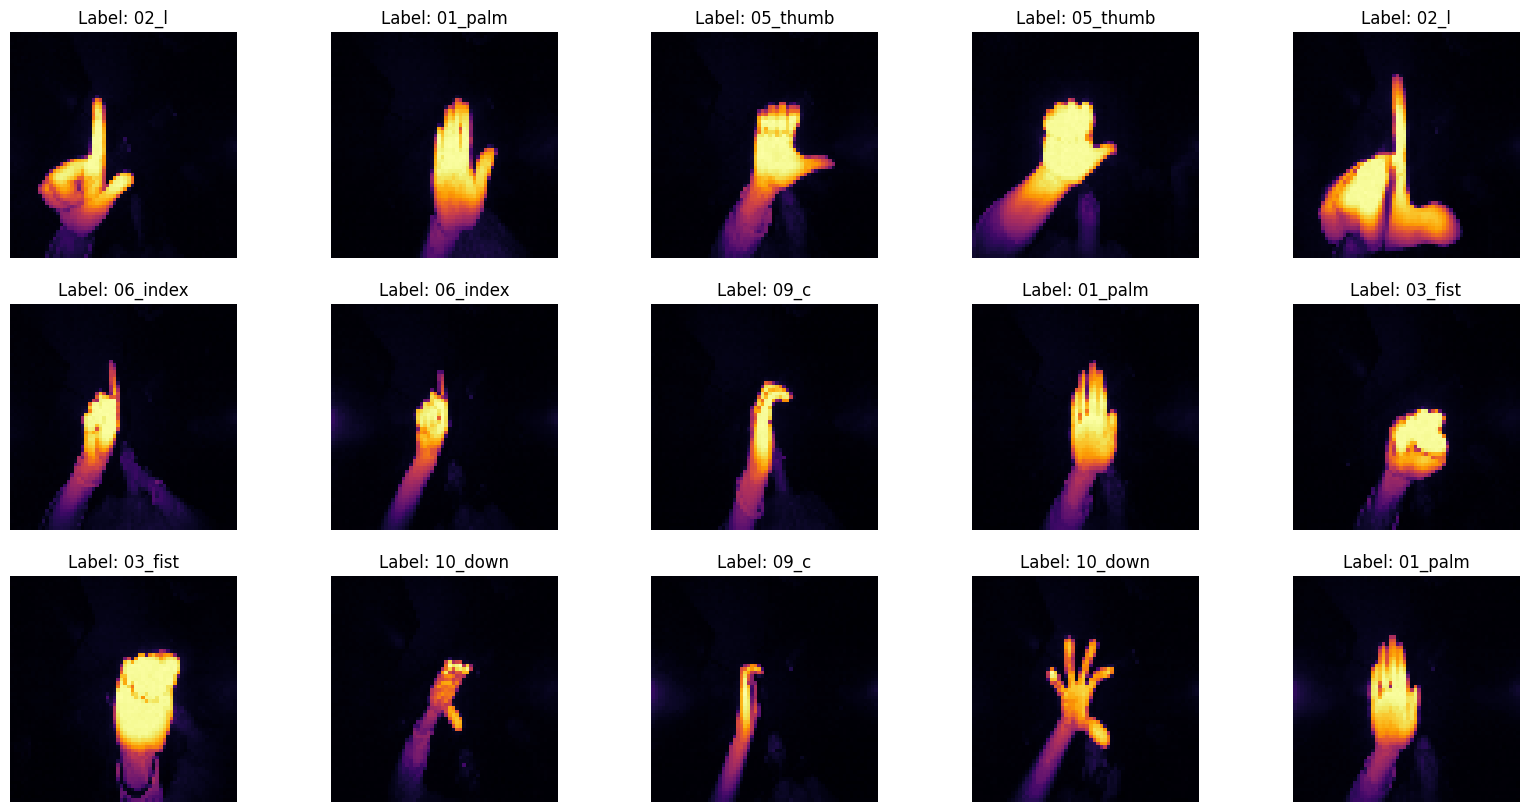

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_images(images, labels, label_encoder, num_images=15, IMG_SIZE=64):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(3, num_images // 3, i + 1)
        plt.imshow(images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='inferno')
        plt.title(f"Label: {label_encoder.inverse_transform([np.argmax(labels[i])])[0]}")
        plt.axis('off')
    plt.show()

display_sample_images(X_train, y_train, label_encoder, num_images=15)